In [7]:
#**********************************
# Image Alignment Demo
#**********************************

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Read in images
img1_name = 'original.png'
#img1_name = 'skewed1.png'
img2_name = 'skewed2.png'

img1 = cv2.imread(img1_name, 0)
img2 = cv2.imread(img2_name, 0)

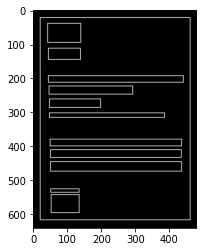

In [9]:
plt.imshow(img1, cmap='gray')

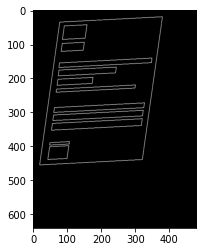

In [10]:
plt.imshow(img2, cmap='gray')

In [11]:
# Align two images
'''
Input:
    grayscale images to align
Return:
    N/A

Source: https://learnopencv.com/feature-based-image-alignment-using-opencv-c-python/

Maybe useful tutorial on ORB descriptor
https://gilscvblog.com/2013/10/04/a-tutorial-on-binary-descriptors-part-3-the-orb-descriptor/
'''
def image_align(img1, img2):
    # Find keypoints and descriptors with ORB
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)
    
    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2, None)

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)
    
    # Remove not so good matches
    numGoodMatches = int(len(matches) * 0.20)
    matches = matches[:numGoodMatches]
    
    # Draw top matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None)
    #cv2.imwrite("matches.jpg", img_matches)
    #plt.imshow(img_matches)
    
    #'''
    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    
    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    #height, width, channels = img2.shape
    height, width = img2.shape
    img1_reg = cv2.warpPerspective(img1, h, (width, height))
    
    return img1_reg, h
    #'''


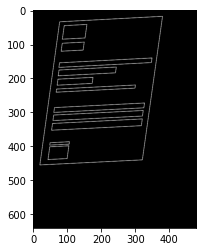

In [12]:
#image_align(og_img, skew_img)
img1_reg, h = image_align(img1, img2)

plt.imshow(img1_reg, cmap='gray')
#cv2.imwrite('img_registration.jpg', img1_reg)